In [151]:
# !pip install paddleocr
# !pip install paddlepaddle-gpu

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [6]:
import os
import sys

from natsort import natsorted
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
import pandas as pd
from omegaconf import OmegaConf

OPR_PATH  = "/home/beliakin/projects/OpenPlaceRecognition"

sys.path.append(OPR_PATH)
sys.path.append(OPR_PATH + "/src")

from opr.models.other.paddleocr import PaddlePipeline

In [9]:
MODEL_CONFIG_PATH = f"{OPR_PATH}/configs/model/paddleocr/config.yaml"
model_config = OmegaConf.load(MODEL_CONFIG_PATH)
model_config.det_model_dir = f"{OPR_PATH}/weights/paddleocr/infer/det_db_inference_v2"
model_config.rec_model_dir = f"{OPR_PATH}/weights/paddleocr/infer/infer_mv3_v2"
model_config.rec_char_dict_path = f"{OPR_PATH}/weights/paddleocr/dict/ru_dict_2.txt"

In [10]:
pipe = PaddlePipeline(model_config)

### Converting to onnx

In [ ]:
!paddle2onnx --model_dir /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/Multilingual_PP-OCRv3_det_infer/ \
    --model_filename inference.pdmodel \
    --params_filename inference.pdiparams \
    --save_file /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/Multilingual_PP-OCRv3_det_infer/inference.onnx \
    --opset_version 11 \
    --enable_onnx_checker True

In [ ]:
"/home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/"

In [ ]:
!paddle2onnx --model_dir /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/ \
    --model_filename inference.pdmodel \
    --params_filename inference.pdiparams \
    --save_file /home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/inference/ru_mobile_v2.0_rec/inference.onnx \
    --opset_version 16 \
    --enable_onnx_checker True

### Loading models

In [16]:
from PIL import Image, ImageDraw

def crop_images(image_array, polygon_points_list):
    # image = Image.open(image_path).convert("RGBA")
    image = Image.fromarray(image_array).convert("RGBA")
    width, height = image.size

    cropped_images = []

    for polygon_points in polygon_points_list:
        mask = Image.new('L', (width, height), 0)
        draw = ImageDraw.Draw(mask)
        
        draw.polygon(polygon_points, fill=255)
        masked_image = Image.composite(image, Image.new("RGBA", image.size, (0, 0, 0, 0)), mask)
        
        bbox = mask.getbbox()
        if bbox:
            cropped_image = masked_image.crop(bbox).convert("RGB")
            cropped_images.append(np.array(cropped_image).astype(np.uint8))
    
    return cropped_images

def plot_bboxes_grid(images, bboxes_list, nrows=4, ncols=3, figsize=(20, 20)):
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    for i, (img, bboxes) in enumerate(zip(images, bboxes_list)):
        for box in bboxes:
            box = np.array(box).astype(np.int32).reshape(-1, 2)
            cv2.polylines(img, [box], True, color=(255, 255, 0), thickness=2)
        axs[i // ncols, i % ncols].imshow(img)
    plt.show()

In [23]:
# val_path = '/archive/savkin/raw_datasets/text_spotting/RusTitW/real_data/test/rus_titw_test/public_test_images/'
# val_path = "/archive/savkin/raw_datasets/text_spotting/RusTitW/synth_data/test/img_out/img_0_18/"

all_images = os.listdir(val_path)
all_images = natsorted(all_images)
print(len(all_images))

9703


In [24]:
text_detector = pipe.text_detector
text_recognizer = pipe.text_recognizer

Text prediction: палиевь Потемкин Гомеза several lhr_1_3_00000654.jpg


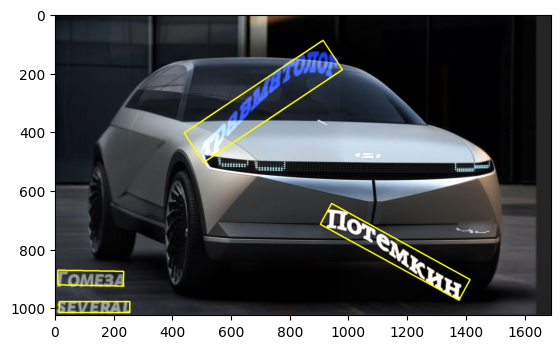

Text prediction: крез пролить lhr_1_3_00000665.jpg


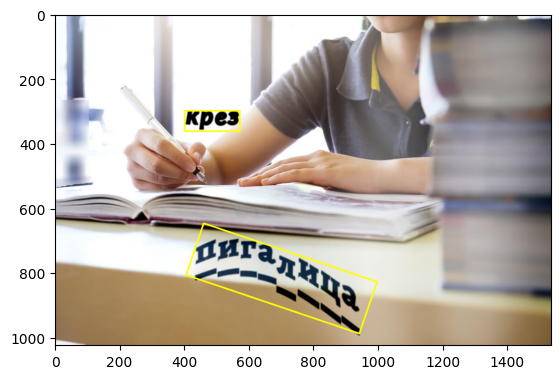

Text prediction: годить сраий lhr_1_3_00000681.jpg


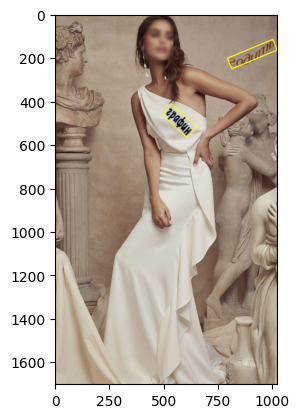

Text prediction: Мартынови- чушь архивный 9373464267 липкий пакозяйственный Масляков Шорникова lhr_1_3_00000688.jpg


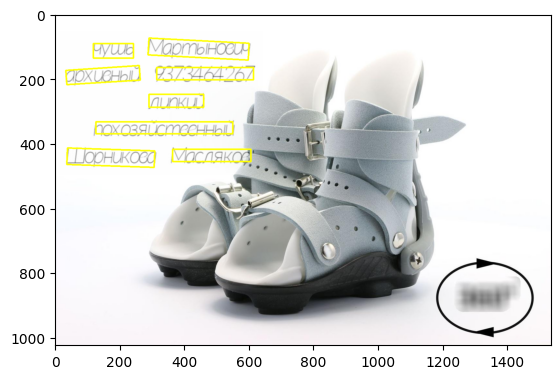

Text prediction: гетман иаомортный lhr_1_3_00000695.jpg


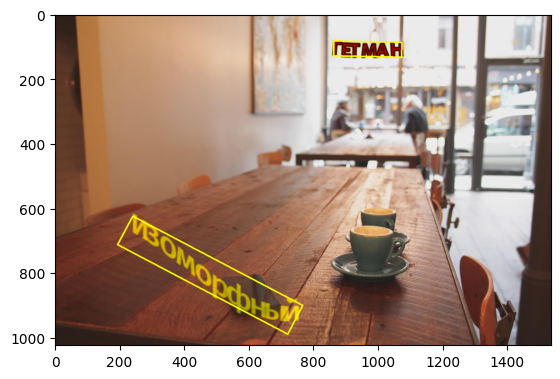

Text prediction: Егорова lhr_1_3_00000697.jpg


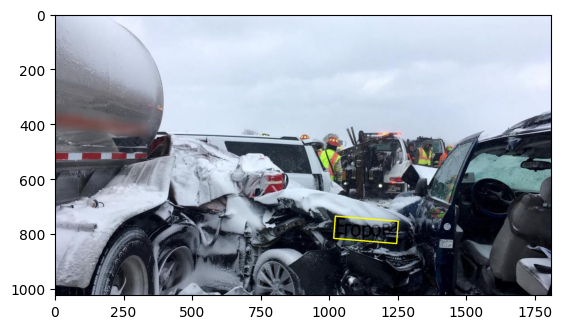

Text prediction: ) бомба согласно битва отпрыгнуть Арсланова column истмат выхлоп явление Шпакова lhr_1_3_00000701.jpg


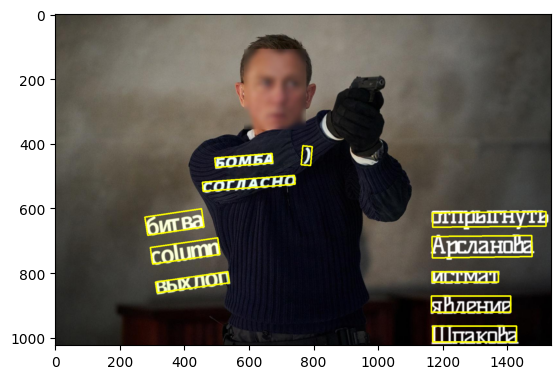

Text prediction: Лукша петит. поэт lhr_1_3_00000709.jpg


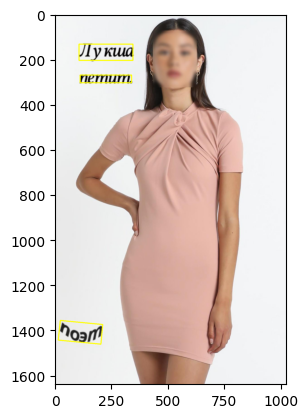

Text prediction: рвать lhr_1_3_00000721.jpg


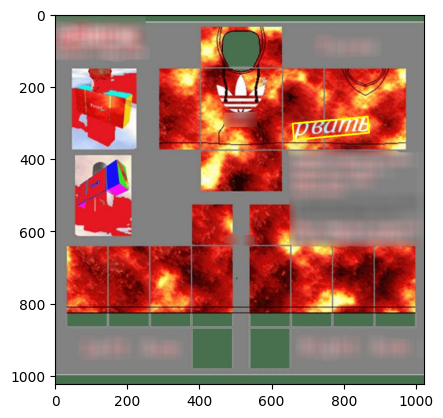

Text prediction: колмерческий- космический 9199122581 lhr_1_3_00000728.jpg


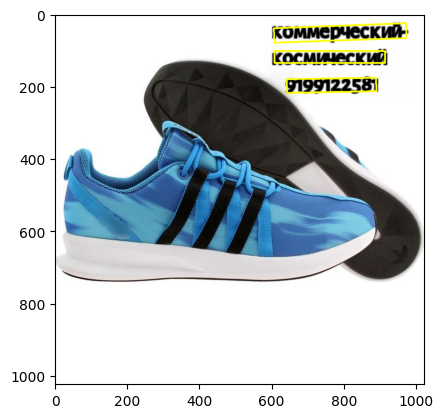

Text prediction: Зарубо lhr_1_3_00000742.jpg


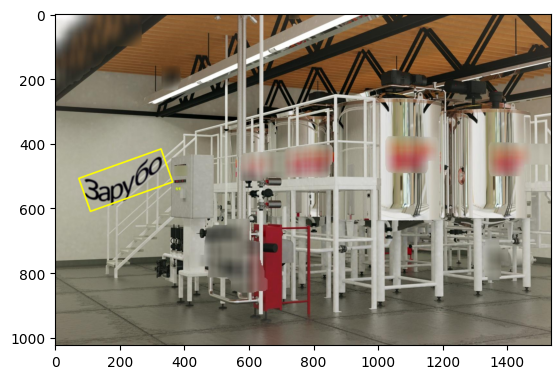

Text prediction: фотобумага. сур ! lhr_1_3_00000746.jpg


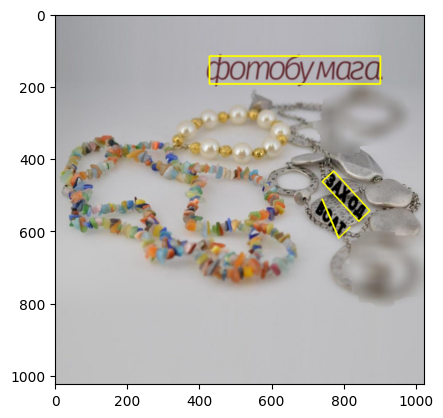

Text prediction: 43995 : , 41991 козни сиянье 56692- lhr_1_3_00000748.jpg


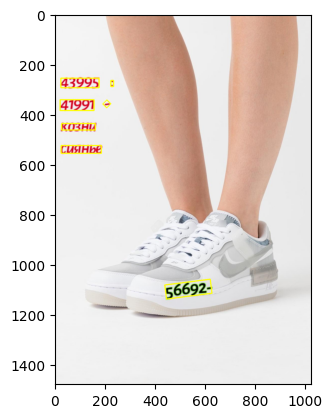

Text prediction: Митрошин приказный противень lhr_1_3_00000762.jpg


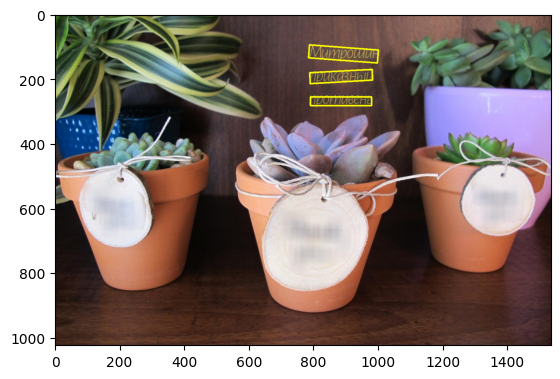

Text prediction: все-все-все Коршова геосистема lhr_1_3_00000768.jpg


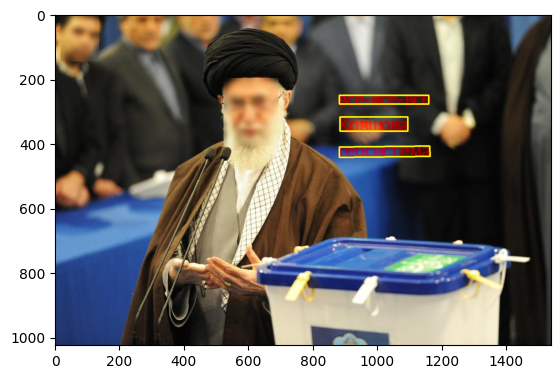

Text prediction: киоскер 93945 геройский горец протез( порция lhr_1_3_00014572.jpg


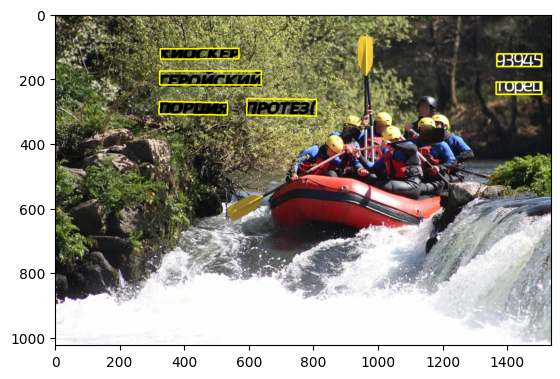

Text prediction: оживить lhr_1_3_00014576.jpg


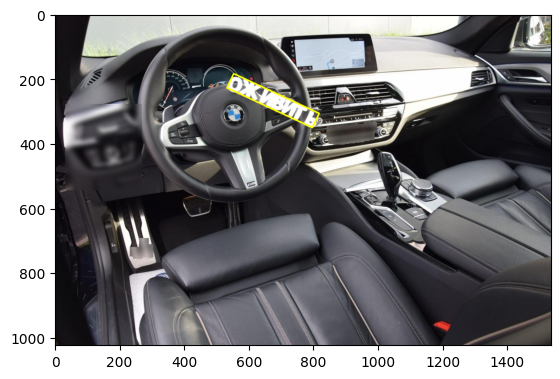

Text prediction: метрология; росточек впаять сит любоваться комбинат lhr_1_3_00014577.jpg


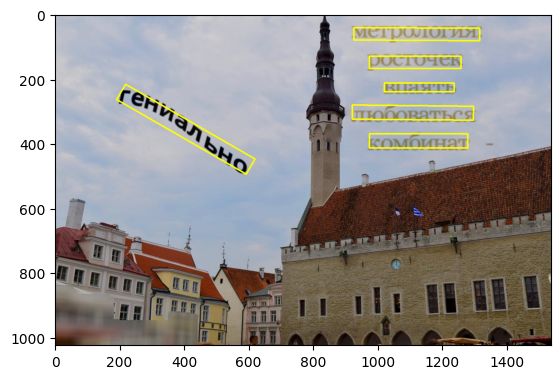

Text prediction: пеизведаяный Шитов заячий зизави Холин писа open lhr_1_3_00014578.jpg


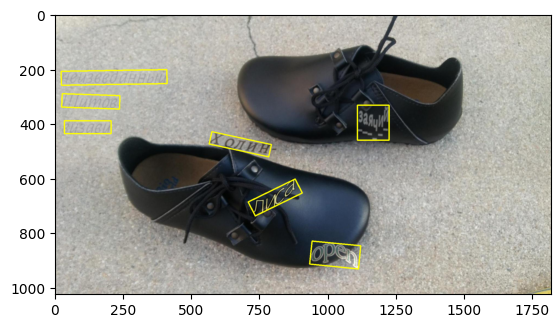

Text prediction: Алай melod- lhr_1_3_00014600.jpg


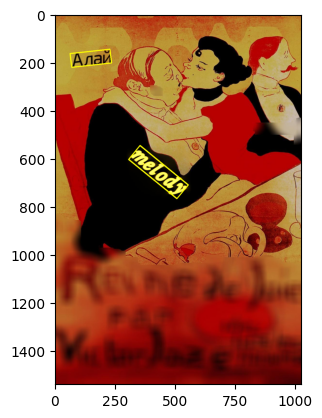

Text prediction: Мошкова прав Дещена lhr_1_3_00014622.jpg


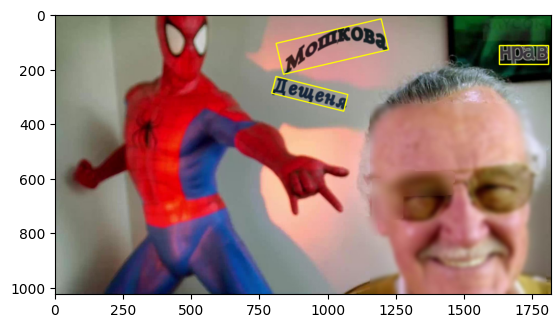

Text prediction: лать! Аввакум Ваина птитй lhr_1_3_00014629.jpg


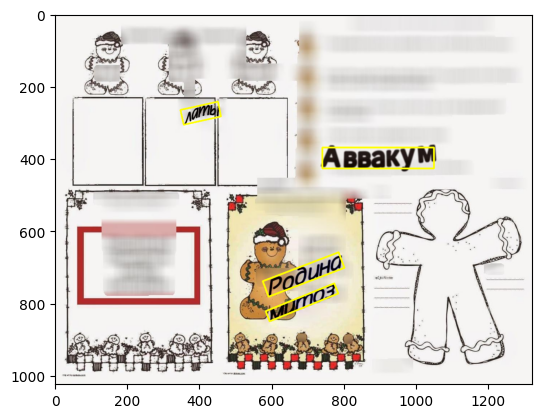

Text prediction: солевой Адамович lhr_1_3_00014631.jpg


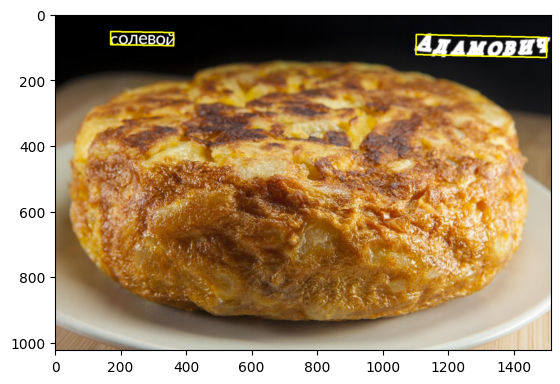

Text prediction: Трус налог враэ 60677 lhr_1_3_00014637.jpg


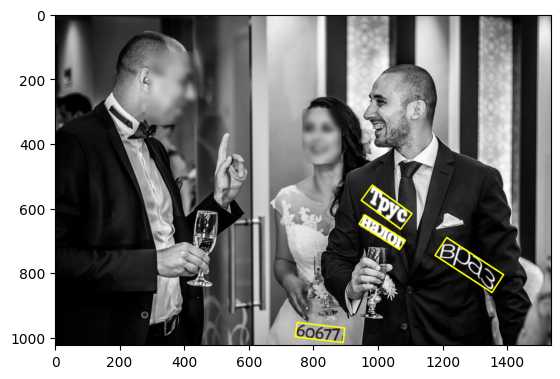

Text prediction: 78122 lhr_1_3_00014638.jpg


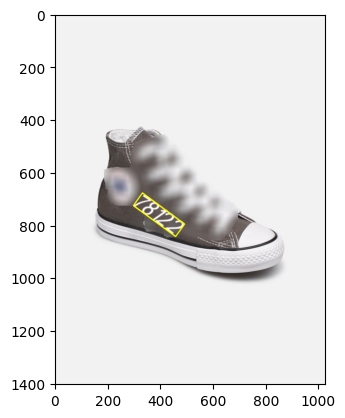

Text prediction: акула меииа слияние Педант lhr_1_3_00014659.jpg


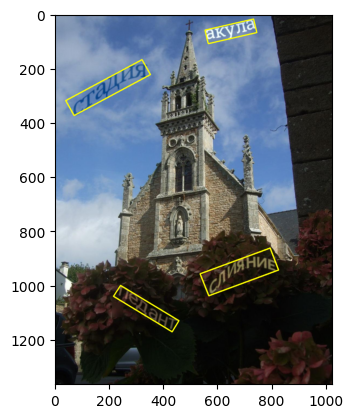

Text prediction: Алещенко острый; lhr_1_3_00014668.jpg


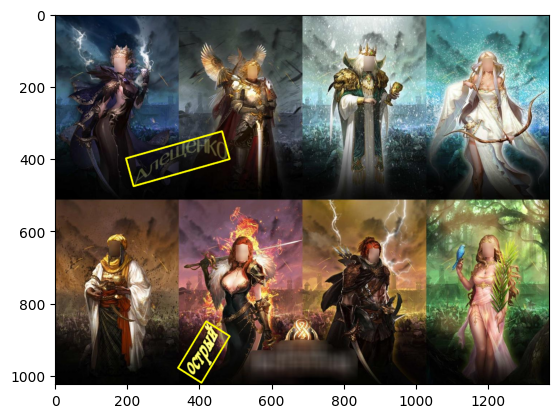

Text prediction: Леонов госорган: lhr_1_3_00014673.jpg


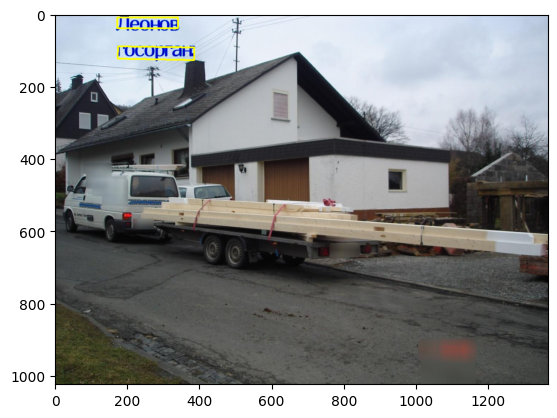

Text prediction: ппаа Дедкова lhr_1_3_00014674.jpg


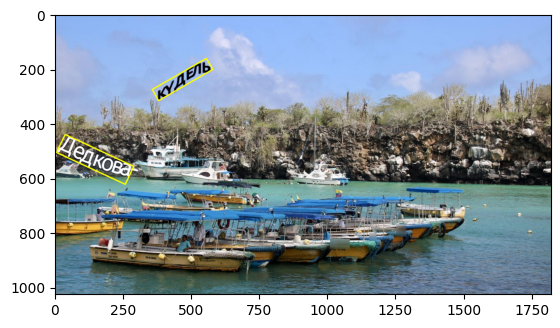

Text prediction: слтеть Шагин lhr_1_3_00014675.jpg


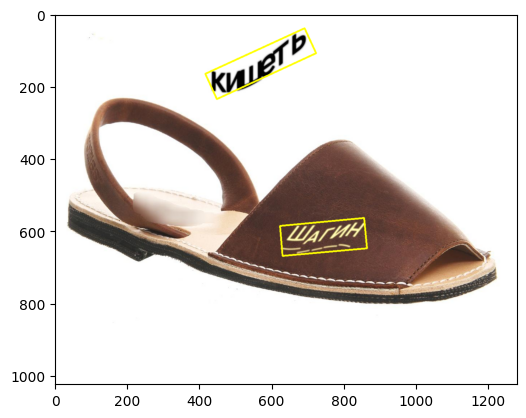

In [25]:
coords = []
images = []
texts = []
stats = []

for im in all_images[50:80]:
    opened_image = cv2.imread(val_path + im)
    opened_image = cv2.cvtColor(opened_image, cv2.COLOR_BGR2RGB)
    # filtered_boxes, rec_res, stat = pipe(opened_image)
    coord, _ = text_detector(opened_image)
    cropped_images = crop_images(opened_image, coord)
    rec_res, _ = text_recognizer(cropped_images)
    # stats.append(stat)
    for box in coord:
        box = np.array(box).astype(np.int32).reshape(-1, 2)
        cv2.polylines(opened_image, [box], True, color=(255, 255, 0), thickness=3)
    text = " ".join([text for text, prob in rec_res][::-1])
    print(f'Text prediction: {text}', im)
    plt.imshow(opened_image)
    plt.show()

In [12]:
# from paddleocr import PaddleOCR

# char =  f"{OPR_PATH}/weights/paddleocr/dict/ru_dict.txt"
# rec_model_dir = f"/home/beliakin/projects/russian_text_spotting/lib/PaddleOCR/output/rec/infer_mv3/"
# det_model_dir = f"{OPR_PATH}/weights/paddleocr/infer/Multilingual_PP-OCRv3_det_infer/"
# rec_model_dir = f"{OPR_PATH}/weights/paddleocr/infer/rec_svtr_tiny_stn_rus"

# ocr = PaddleOCR(use_gpu=True, rec_model_dir=rec_model_dir, rec_image_shape="3, 32, 100",
#                 rec_char_dict_path=char, det_model_dir=det_model_dir)

# # result = ocr.ocr('id_1000_value_176_881.jpg', cls=False, det=False)
# # answer = str(result[0][0][0])
# # print(answer)

In [123]:
result = ocr.ocr(img_path, cls=False, det=True, )

[2024/06/30 11:15:51] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.0261538028717041
[2024/06/30 11:15:51] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.0261538028717041
[2024/06/30 11:15:51] ppocr DEBUG: rec_res num  : 7, elapsed : 0.023151397705078125
[2024/06/30 11:15:51] ppocr DEBUG: rec_res num  : 7, elapsed : 0.023151397705078125


In [124]:
result

[[[[[1150.0, 24.0], [1441.0, 24.0], [1441.0, 69.0], [1150.0, 69.0]],
   ('9647950822', 0.9761211276054382)],
  [[[1153.0, 103.0], [1404.0, 97.0], [1406.0, 153.0], [1154.0, 159.0]],
   ('еврооблить', 0.8069666028022766)],
  [[[1393.0, 105.0], [1529.0, 109.0], [1528.0, 156.0], [1392.0, 152.0]],
   ('гация', 0.9998944401741028)],
  [[[482.0, 355.0], [722.0, 254.0], [750.0, 321.0], [510.0, 422.0]],
   ('крской', 0.86128169298172)]]]

In [ ]:
df_stats = pd.DataFrame(stats)

In [ ]:
df_stats.describe()

# Metrics

In [26]:
import pandas as pd

In [27]:
import os
import cv2
import numpy as np
from cer import calculate_cer
from shapely.geometry import Polygon
from typing import List, Tuple, Dict
import pandas as pd



def calculate_iou(boxA: List[Tuple[int, int]], boxB: List[Tuple[int, int]]) -> float:
    """
    Calculate the Intersection over Union (IoU) between two bounding boxes.

    Args:
        boxA (List[Tuple[int, int]]): List of points (x, y) defining the first bounding box.
        boxB (List[Tuple[int, int]]): List of points (x, y) defining the second bounding box.

    Returns:
        float: IoU value between the two bounding boxes.
    """
    polyA = Polygon(boxA)
    polyB = Polygon(boxB)

    if not polyA.is_valid or not polyB.is_valid:
        return 0.0

    inter_area = polyA.intersection(polyB).area
    union_area = polyA.area + polyB.area - inter_area
    if union_area == 0:
        return 0.0

    return inter_area / union_area

def evaluate_ocr(
    gt_boxes: List[List[Tuple[int, int]]], 
    gt_texts: List[str], 
    pred_boxes: List[List[Tuple[int, int]]], 
    pred_texts: List[str], 
    iou_threshold: float = 0.1
) -> Tuple[float, float, float, float]:
    """
    Evaluate OCR performance by calculating precision, recall, F1-score, and average IoU.

    Args:
        gt_boxes (List[List[Tuple[int, int]]]): List of ground truth bounding boxes.
        gt_texts (List[str]): List of ground truth texts corresponding to the bounding boxes.
        pred_boxes (List[List[Tuple[int, int]]]): List of predicted bounding boxes.
        pred_texts (List[str]): List of predicted texts corresponding to the bounding boxes.
        iou_threshold (float, optional): IoU threshold to determine true positives. Defaults to 0.5.

    Returns:
        Tuple[float, float, float, float]: Precision, recall, F1-score, and average IoU.
    """
    all_true_positives, all_false_positives, all_false_negatives = [], [], []
    iou_list = []
    true_positives = 0
    false_positives = 0
    ordered_gt_texts = []
    ordered_pred_texts = []
    
    for pred_box, pred_text in zip(pred_boxes, pred_texts):
        max_i, max_iou = -1, 0
        for i, gt_box in enumerate(gt_boxes):
            iou = calculate_iou(pred_box, gt_box)
            if iou > max_iou:
                max_iou = iou
                max_i = i
        if max_iou >= iou_threshold:
            true_positives += 1
            ordered_pred_texts.append(pred_text)
            ordered_gt_texts.append(gt_texts[max_i])
        else:
            false_positives += 1
        iou_list.append(max_iou)
    if len(ordered_pred_texts) != 0:
        cer_list = calculate_cer(ordered_pred_texts, ordered_gt_texts)
    else:
        cer_list = []
    false_negatives = len(gt_boxes) - true_positives
    all_true_positives.append(true_positives)
    all_false_positives.append(false_positives)
    all_false_negatives.append(false_negatives)
    
    precision = np.sum(all_true_positives) / (np.sum(all_true_positives) + np.sum(all_false_positives))
    recall = np.sum(all_true_positives) / (np.sum(all_true_positives) + np.sum(all_false_negatives))
    f1 = 2 * (precision * recall) / (precision + recall)
    iou_avg = np.mean(iou_list)
    
    return {"precision": precision, "recall": recall, "f1": f1, "iou_avg": iou_avg}

In [28]:
mid_path = "/archive/savkin/raw_datasets/OCR/ITLP_Campus_indoor_part2/00_2023-10-25-night/night_ann.csv"
night_path = "/archive/savkin/raw_datasets/OCR/ITLP_Campus_indoor_part2/01_2023-11-09-twilight/midnight_ann.csv" 

In [30]:
mid_df = pd.read_csv(mid_path, index_col=0)
mid_df["type"] = "midnight"
night_df = pd.read_csv(night_path, index_col=0)
night_df["type"] = "night"
it_df = pd.concat([mid_df, night_df], axis=0)
it_df.dropna(inplace=True)
it_df.reset_index(drop=True, inplace=True)
it_df["points"] = it_df["points"].apply(eval)
it_df["transcription"] = it_df["transcription"].apply(eval)

new_rows = []
for img_path, ds in it_df.dropna().groupby("img_path"):
    img_path = img_path.split("OCR/")[1]
    new_rows.append(
        {
            "points":ds.points.values.tolist(),
            "transcription":[text[0] for text in ds.transcription.values.tolist()],
            "rotation":ds.rotation.values.tolist(),
            # "timestamp":ds.timestamp.values[0],
            "type":ds["type"].values[0],
            "img_path":img_path,
        }
    )

metrics_df = pd.DataFrame(new_rows)

In [31]:
images = metrics_df.img_path.tolist() 

In [32]:
text_detector = pipe.text_detector
text_recognizer = pipe.text_recognizer

In [33]:
from tqdm.notebook import tqdm

In [34]:
ds_path = "/archive/savkin/raw_datasets/OCR/"

In [49]:
pred_boxes = []
pred_texts = []

for im in tqdm(images):
    opened_image = cv2.imread(ds_path + im)
    opened_image = cv2.cvtColor(opened_image, cv2.COLOR_BGR2RGB)
    # filtered_boxes, rec_res, stat = pipe(opened_image)
    filtered_boxes, _ = text_detector(opened_image)
    cropped_images = crop_images(opened_image, filtered_boxes)
    rec_res, _ = text_recognizer(cropped_images)
    rec_res = [text for text, prob in rec_res][::-1]
    pred_boxes.append(filtered_boxes)
    pred_texts.append(rec_res)

  0%|          | 0/953 [00:00<?, ?it/s]

In [54]:
metrics_df["pred_boxes"] = pred_boxes
metrics_df["pred_text"] = pred_texts

In [55]:
def apply_metrics(row):
    try:
        metrics = evaluate_ocr(
            gt_boxes=row["points"],
            gt_texts=row["transcription"],
            pred_boxes=row["pred_boxes"],
            pred_texts=row["pred_text"]
        )
    except Exception as e:
        print(row)
        print(len(row.points))
        print(len(row.transcription))
        raise e
    metrics["type"] = row["type"]
    return metrics

In [56]:
computed_metrics = metrics_df.apply(apply_metrics, axis=1).values.tolist()
df_metric_results = pd.DataFrame(computed_metrics)

In [57]:
df_metric_results[df_metric_results["type"] == "night"].describe()

precision      recall          f1     iou_avg
count  177.000000  545.000000  131.000000  177.000000
mean     0.717514    0.211162    0.898092    0.445334
std      0.442214    0.391808    0.182897    0.298513
min      0.000000    0.000000    0.250000    0.000000
25%      0.000000    0.000000    0.733333    0.000000
50%      1.000000    0.000000    1.000000    0.554074
75%      1.000000    0.000000    1.000000    0.698635
max      1.000000    1.000000    1.000000    0.885168

In [58]:
metrics_df[["transcription", "pred_text", "img_path"]][metrics_df.pred_text.apply(lambda x: len(x) > 0)].tail(50)

transcription pred_text  \
799             [квант]      [ен]   
801             [квант]   [кват.]   
802               [ква]      [ен]   
804  [3.33, 3.32, 3.29]    [здыт]   
809               [ант]     [ант]   
814              [3.28]      [я6]   
816              [3.27]    [-, -]   
817              [3.27]       [у]   
819              [3.30]       [-]   
823              [3.34]       [:]   
829              [4.20]       [!]   
830              [4.29]       [й]   
836             [выход]   [выхал]   
854              [4.25]    [496а]   
855             [квант]    [винт]   
856       [4.26, квант]   [квант]   
857       [4.26, квант]   [кВант]   
859       [4.26, квант]   [калит]   
861             [квант]   [квинт]   
862             [квант]   [квант]   
865             [квант]   [крант]   
867       [4.26, квант]    [кант]   
868        [4.26, вант]    [вант]   
869              [кван]    [кВан]   
874             [квант]    [кант]   
876             [квант]   [кnant]   
877              [4.23]     [трз]   
879             [квант]   [кзант]   
880             [квант]   [klант]   
881             [квант]   [клант]   
882             [квант]   [кВiнt]   
883             [квант]   [квант]   
885        [4.25, 4.22]       [)]   
886        [4.26, вант]    [за-t]   
887              [вант]    [зант]   
888              [вант]    [зант]   
889   [4.26, ант, 4.25]    [laнт]   
890   [ант, 4.26, 4.25]      [aТ]   
901              [4.25]  [ен, ен]   
907              [4.21]        []   
910             [выход]       [;]   
915              [4.27]        []   
916             [выход]  [рыход)]   
917             [выход]   [выход]   
925              [4.18]     [sin]   
933              [4.16]      [ll]   
935              [4.19]      [se]   
936              [4.19]       [:]   
939              [4.18]       [?]   
947              [4.10]       [)]   

                                              img_path  
799  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
801  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
802  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
804  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
809  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
814  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
816  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
817  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
819  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
823  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
829  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
830  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
836  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
854  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
855  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
856  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
857  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
859  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
861  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
862  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
865  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
867  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
868  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
869  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
874  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
876  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
877  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
879  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
880  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
881  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
882  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
883  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
885  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
886  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
887  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
888  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...  
889  ITLP_Cam

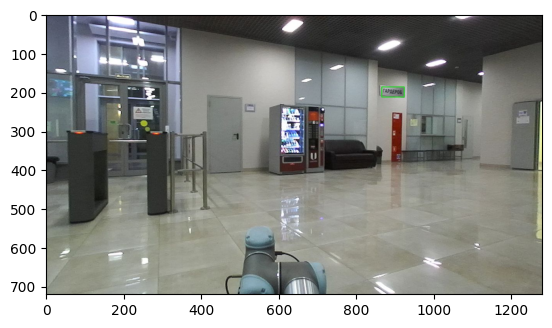

Text prediction: 
Actual: гардероб


In [59]:
idx = 59
row = metrics_df.iloc[idx]

im = row["img_path"]
rec_res = row["pred_text"]
pred_boxes = row["pred_boxes"]
gt_boxes = row["points"]
trs = row["transcription"][0]

opened_image = cv2.imread(ds_path + im)
opened_image = cv2.cvtColor(opened_image, cv2.COLOR_BGR2RGB)

for box in pred_boxes:
    box = np.array(box).astype(np.int32).reshape(-1, 2)
    cv2.polylines(opened_image, [box], True, color=(255, 255, 0), thickness=2)

for box in gt_boxes:
    box = np.array(box).astype(np.int32).reshape(-1, 2)
    cv2.polylines(opened_image, [box], True, color=(50, 205, 50), thickness=2)

text = " ".join(rec_res)
plt.imshow(opened_image)
plt.show()
print(f'Text prediction: {text}')
print(f"Actual: {trs}")

In [60]:
metrics_df.to_csv("metrics_ocr_01_07.csv")

In [61]:
metrics_df

points  \
0    [[[0.930232558139535, 4.7961634663806766e-15],...   
1    [[[0.0, 82.79069767441861], [157.2093023255814...   
2    [[[893.953488372093, 0.0], [1136.7441860465117...   
3    [[[386.9767441860465, 48.372093023255815], [60...   
4    [[[0.0, 36.27906976744186], [197.2093023255813...   
..                                                 ...   
948  [[[912.601530462189, 166.88712899803798], [969...   
949  [[[813.59646791755, 223.50968932921546], [854....   
950  [[[1037.3789131205042, 301.8824012728775], [10...   
951  [[[1114.0111692759776, 39.01820164129907], [11...   
952  [[[317.94178006817634, 121.64834287074373], [3...   

                         transcription    rotation      type  \
0            [мфти, фровых технологий]  [0.0, 0.0]  midnight   
1                         [технологий]       [0.0]  midnight   
2    [мфти, центр цифровых технологий]  [0.0, 0.0]  midnight   
3    [мфти, центр цифровых технологий]  [0.0, 0.0]  midnight   
4                               [мфти]       [0.0]  midnight   
..                                 ...         ...       ...   
948                             [4.10]       [0.0]     night   
949                             [4.10]       [0.0]     night   
950                          [от себя]       [0.0]     night   
951                             [4.27]       [0.0]     night   
952                             [4.27]       [0.0]     night   

                                              img_path pred_boxes pred_text  
0    ITLP_Campus_indoor_part2/00_2023-10-25-night/a...         []        []  
1    ITLP_Campus_indoor_part2/00_2023-10-25-night/a...         []        []  
2    ITLP_Campus_indoor_part2/00_2023-10-25-night/a...         []        []  
3    ITLP_Campus_indoor_part2/00_2023-10-25-night/a...         []        []  
4    ITLP_Campus_indoor_part2/00_2023-10-25-night/a...         []        []  
..                                                 ...        ...       ...  
948  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...         []        []  
949  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...         []        []  
950  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...         []        []  
951  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...         []        []  
952  ITLP_Campus_indoor_part2/01_2023-11-09-twiligh...         []        []  

[953 rows x 7 columns]